### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster

### Part I - Importing the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename columns Annual Income (k$) and Spending Score(1-100)
df.rename(columns = {
    'Annual Income (k$)':'Income',
    'Spending Score (1-100)':'Spending Score'
}, inplace = True)

In [4]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


c:\Users\barce\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


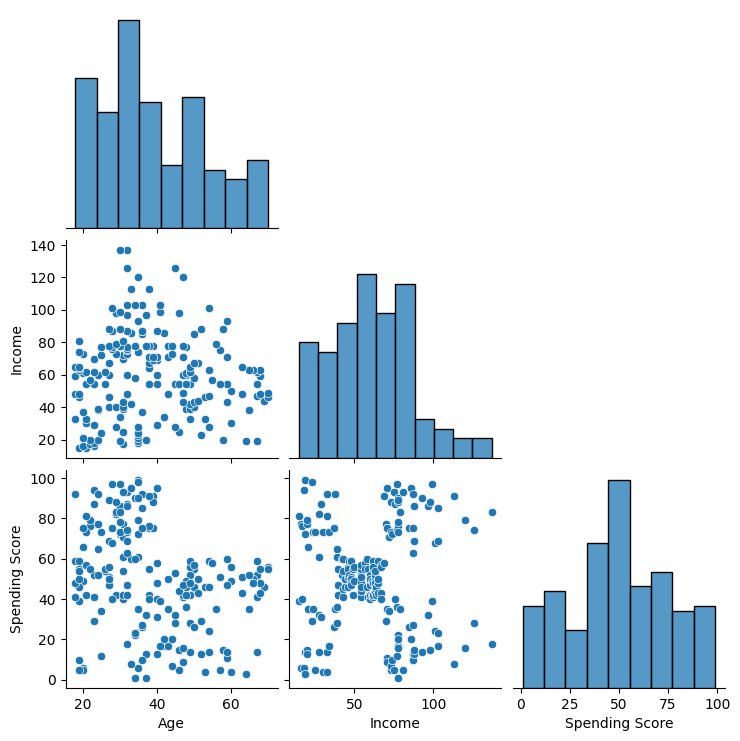

In [5]:
# Pairplot between Age, Income, and Spending Score
sns.pairplot(df[['Age', 'Income', 'Spending Score']], diag_kind="hist", corner=True)

### Part II - Perform K-mean Cluster to Spending Score vs. Income plot with 5 clusters

In [6]:
# Spending score vs. Income plot
kmeans = cluster.KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(df[['Spending Score', 'Income']])
# Print the cluster centers
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

### Part III - Attach Cluster to the Original Data

In [7]:
# Show the cluster labels
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [8]:
# Add the cluster in the dataset
df['Clusters'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [9]:
# Print the number of counts of each cluster in the dataset
index = pd.Index(df['Clusters'], name="Cluster")
df.value_counts(index)

Cluster
0    81
1    39
2    35
3    23
4    22
Name: count, dtype: int64

### Part IV - Plot Cluster on Chart

[Text(0.5, 1.0, 'Spending score vs. Income')]

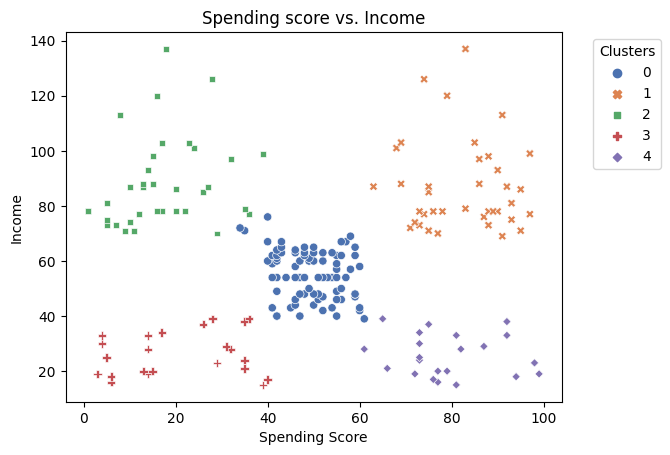

In [10]:
fig = sns.scatterplot(data=df, x="Spending Score", y="Income", 
                      hue="Clusters", style="Clusters", palette="deep")
fig.legend(title="Clusters", bbox_to_anchor=(1.05, 1))
fig.set(title="Spending score vs. Income")